In [0]:
%matplotlib inline

In [0]:
from matplotlib import pyplot as plt  #importing neccessary libraries.
import numpy as np
from win32com.client import Dispatch 
speak = Dispatch("SAPI.SpVoice") 

In [0]:
data = [[3, 1.5, 0],[2, 1, 1],[4, 1.5, 0],[3, 1, 1],[3.5, 0.5, 0],[2, 0.5, 1], [5.5, 1, 0], [1, 1, 1]]

#data = [Length, Width, Colour = Blue(1) or red(0)]

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))   #Computing sigmoid
def sigmoid_d(x):
    return sigmoid(x)*(1-sigmoid(x)) #computing derivative of sigmoid

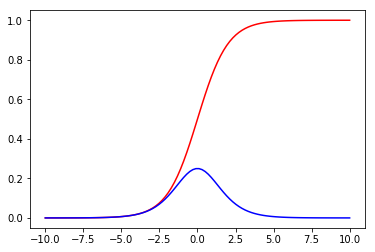

In [0]:
#To Visualize the sigmoid's
T = np.linspace(-10,10,100)  
Y = sigmoid(T)
Z = sigmoid_d(T)
plt.plot(T,Y,c='r')
plt.plot(T,Z,c='b')

[3, 1, 1]
[4, 1.5, 0]
[2, 0.5, 1]
[4, 1.5, 0]
[2, 1, 1]
[1, 1, 1]
[3.5, 0.5, 0]
[2, 1, 1]


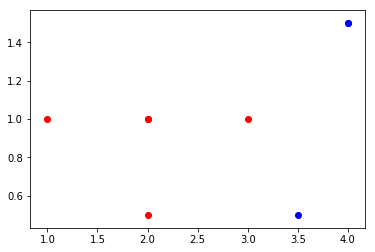

In [0]:
#To generate duplicate data for increasing number of data points.
for i in range(len(data)):
    ri = np.random.randint(len(data))
    point = data[ri]
    color="r"
    if point[2] == 0:
        color="b"
    plt.scatter(point[0],point[1],c=color)
    print(point)
    

# The Neural Network which I have designed for predicting whether it is a Blue or a Red flower is depicted below:

![alt text](NN.png "Title")

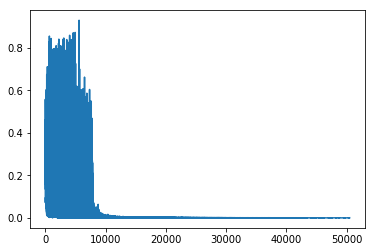

In [0]:
n = 0.4   #Learning rate
costs = []
w1 = np.random.randn()   #Initialize random weight values from normal distribution.
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
w5 = np.random.randn()
w6 = np.random.randn()
b1 = np.random.randn()
b2 = np.random.randn()

for i in range(50000):  #50000 Iterations
    ri = np.random.randint(len(data))
    point = data[ri]
    #Forward propogate
    z1 = point[0]*w1+point[1]*w3+b1
    z2 = point[0]*w2+point[1]*w4+b1
    
    pred_z1 = sigmoid(z1)
    pred_z2 = sigmoid(z2)
    pred_z = pred_z1*w5 + pred_z2*w6 + b2   
    pred = sigmoid(pred_z)
    
    target = point[2]
    cost = np.square(pred - target)  #Compute the mean squared loss
    costs.append(cost)
    
    #Back propagation
    #Compute all the derivatives required for gradient descent
    d_cost_pred = 2*(pred - target)   
    d_pred_z1 = sigmoid_d(z1)
    d_pred_z2 = sigmoid_d(z2)
    d_pred_z = sigmoid_d(pred_z)
    
    dz_dw5 = pred_z1
    dz_dw6 = pred_z2
    dz_db2 = 1
    dz_db2 = 1
    
    dz1_dw1 = point[0]
    dz1_dw3 = point[1]
    dz1_db1 = 1
    
    dz2_dw2 = point[0]
    dz2_dw4 = point[1]
    dz2_db1 = 1
    
    dcost_dw5 = d_cost_pred * d_pred_z * dz_dw5
    dcost_dw6 = d_cost_pred * d_pred_z * dz_dw6
    dcost_db2 = d_cost_pred * d_pred_z * dz_db2
    
    w5 = w5 - n * dcost_dw5   #Gradient Descent Algorithm
    w6 = w6 - n * dcost_dw6
    b2 = b2 - n * dcost_db2
    
    dz_dz1 = w5
    dz_dz2 = w6
    
    d_cost_dz = d_cost_pred
    d_cost_pred_z1 = d_cost_dz * dz_dz1
    d_cost_pred_z2 = d_cost_dz * dz_dz2
       
    
    dcost_dw1 = d_cost_pred_z1 * d_pred_z1 * dz1_dw1
    dcost_dw2 = d_cost_pred_z2 * d_pred_z2 * dz2_dw2
    dcost_dw3 = d_cost_pred_z1 * d_pred_z1 * dz1_dw3
    dcost_dw4 = d_cost_pred_z2 * d_pred_z2 * dz2_dw4
    
    dcost_db1 = d_cost_pred_z1 * d_pred_z1 * dz1_db1 + d_cost_pred_z2 * d_pred_z2 * dz2_db1
     
    w1 = w1 - n * dcost_dw1
    w2 = w2 - n * dcost_dw2
    w3 = w3 - n * dcost_dw3
    w4 = w4 - n * dcost_dw4
    b1 = b1 - n * dcost_db1
    
    if i%100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            z1 = point[0]*w1+point[1]*w3+b1
            z2 = point[0]*w2+point[1]*w4+b1
            z = pred_z1*w5+pred_z2*w6+b2
            pred = sigmoid(z)
            target = point[2]
            cost_sum +=np.square(pred - target)
        costs.append(cost_sum/len(data))
        
plt.plot(costs)   #Plot the loss 
plt.show()
#Below graph represents that after 10000 iterations we are getting almost 0 loss. Hence model is good.

In [0]:
#Testing
for i in range(len(data)):
    point = data[i]
    print(point)
    z1 = point[0]*w1+point[1]*w3+b1
    z2 = point[0]*w2+point[1]*w4+b1
    pred_z1 = sigmoid(z1)
    pred_z2 = sigmoid(z2)
    z = pred_z1*w5+pred_z2*w6+b2
    pred = sigmoid(z)
    print("pred: {}".format(pred))  

[3, 1.5, 0]
pred: 0.024750623321095025
[2, 1, 1]
pred: 0.98601389131421
[4, 1.5, 0]
pred: 5.5719577864494374e-05
[3, 1, 1]
pred: 0.9840044497743404
[3.5, 0.5, 0]
pred: 0.025025814992217427
[2, 0.5, 1]
pred: 0.9862015102813237
[5.5, 1, 0]
pred: 0.00012311431611675375
[1, 1, 1]
pred: 0.9861776415028706


In [0]:
def which_flower(l,w):     #Define a function to predict the flower
    z1 = l*w1 + w*w3 + b1
    z2 = l*w2 + w*w4 + b1
    pred_z1 = sigmoid(z1)
    pred_z2 = sigmoid(z2)
    z = pred_z1*w5+pred_z2*w6+b2
    pred = sigmoid(z)
    if pred < 0.5:     #If the output of the sigmoid is less that 0.5 then it is a Red Flower.
        
        print("Red")
        speak.Speak("Red")

    else:               #Else it is a Blue Flower.
       
        print("Blue")
        speak.Speak("Blue")

    

In [0]:
which_flower(5,5)

Red
